In [64]:
import pandas as pd
import psycopg2 as pg2
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [45]:
conn = pg2.connect(user='postgres',  dbname='penny', host='localhost', port='5432', password='')


In [47]:
df = pd.read_sql ("""Select * from steve""", conn)

In [30]:
df.groupby("bidvalue", "cardtype").mean()

ValueError: No axis named cardtype for object type <class 'pandas.core.frame.DataFrame'>

In [39]:
df[df.iswinner==1].groupby(["cardtype", "cardvalue", "bidvalue"]).count()

auctionid  auctiontime  limited_allowed  bid  \
cardtype   cardvalue bidvalue                                                 
Amazon     25        20              100          100              100  100   
                     30              100          100              100  100   
           50        20               99           99               99   99   
                     30              100          100              100  100   
                     35               99           99               99   99   
           75        30               98           98               98   98   
           100       30               99           99               99   99   
           150       30               99           99               99   99   
Home Depot 25        20              100          100              100  100   
                     30              100          100              100  100   
           50        0                41           41               41   41   
                     30               99           99               99   99   
                     35               57           57               57   57   
None       0         15              100          100              100  100   
                     25              100          100              100  100   
                     50              100          100              100  100   
                     100             100          100              100  100   
                     250              99           99               99   99   
Shell      25        20              100          100              100  100   
           50        20              100          100              100  100   
                     30              100          100              100  100   
                     35              100          100              100  100   
Target     25        20              100          100              100  100   
                     30              100          100              100  100   
Walmart    25        20              100          100              100  100   
                     30              100          100              100  100   
           50        20              100          100              100  100   
                     30              100          100              100  100   
                     35              100          100              100  100   

                               username  is_bidomatic  iswinner  ispen  \
cardtype   cardvalue bidvalue                                            
Amazon     25        20             100           100       100    100   
                     30             100           100       100    100   
           50        20              99            99        99     99   
                     30             100           100       100    100   
                     35              99            99        99     99   
           75        30              98            98        98     98   
           100       30              99            99        99     99   
           150       30              99            99        99     99   
Home Depot 25        20             100           100       100    100   
                     30             100           100       100    100   
           50        0               41            41        41     41   
                     30              99            99        99     99   
                     35              57            57        57     57   
None       0         15             100           100       100    100   
                     25             100           100       100    100   
                     50             100           100       100    100   
                     100            100           100       100    100   
                     250             99            99        99     99   
Shell      25        20             100           100       100    100   
           50        20    

In [50]:
df.hist[(df.cardtype=="Walmart")&(df.cardvalue==25)&(df.bidvalue==20)&(df.is_winner==True)]

,auctionid,cardvalue,auctiontime,bidvalue,cardtype,limited_allowed,bid,username,is_bidomatic,is_winner,is_pen,eventual_win_price,bids_so_far,eventual_bids,giveup,bidomatic_bids_so_far
12680,113111954,25,2020-01-26 21:05:46,20,Walmart,False,292,mlee1168,True,True,False,292,78,78,False,77
24404,127621147,25,2020-01-28 11:30:58,20,Walmart,True,237,cindyboogs47,False,True,False,237,38,38,False,0
35108,137499588,25,2020-01-22 23:17:50,20,Walmart,False,431,8Outlaws,True,True,False,431,84,84,False,23
43822,147676796,25,2020-01-18 15:26:53,20,Walmart,True,88,fixit08,True,True,False,88,40,40,False,39
46704,152386897,25,2020-02-01 22:05:10,20,Walmart,True,246,trsmopar1951,True,True,False,246,115,115,False,112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855371,969630281,25,2020-01-19 02:17:46,20,Walmart,False,355,demjon72,False,True,False,355,87,87,False,0
864271,976496268,25,2020-01-31 17:28:57,20,Walmart,False,405,DreamOn4U,False,True,False,405,79,79,False,44
868082,981940378,25,2020-01-23 17:10:56,20,Walmart,False,124,winsomelosealot,True,True,False,124,45,45,False,45
888789,995813066,25,2020-01-24 21:18:03,20,Walmart,False,148,Joxtat,True,True,False,148,70,70,False,69


(array([17.,  7.,  7.,  2.,  2.,  8.,  3.,  5.,  3.,  4.,  6.,  4.,  3.,
         0.,  3.,  2.,  0.,  0.,  2.,  1.,  2.,  3.,  3.,  4.,  1.,  0.,
         0.,  1.,  2.,  0.,  0.,  0.,  2.,  1.,  0.,  1.,  0.,  0.,  0.,
         1.]),
 array([  1.  ,  19.85,  38.7 ,  57.55,  76.4 ,  95.25, 114.1 , 132.95,
        151.8 , 170.65, 189.5 , 208.35, 227.2 , 246.05, 264.9 , 283.75,
        302.6 , 321.45, 340.3 , 359.15, 378.  , 396.85, 415.7 , 434.55,
        453.4 , 472.25, 491.1 , 509.95, 528.8 , 547.65, 566.5 , 585.35,
        604.2 , 623.05, 641.9 , 660.75, 679.6 , 698.45, 717.3 , 736.15,
        755.  ]),
 <a list of 40 Patch objects>)

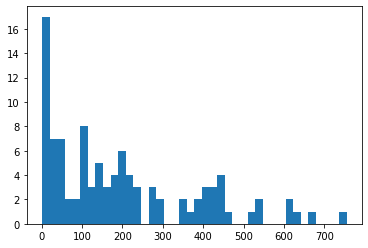

In [58]:
fig, ax = plt.subplots()
ax.hist(df.bid[(df.cardtype=="Walmart")&(df.cardvalue==25)&(df.bidvalue==20)&(df.is_winner==True)], bins=40)

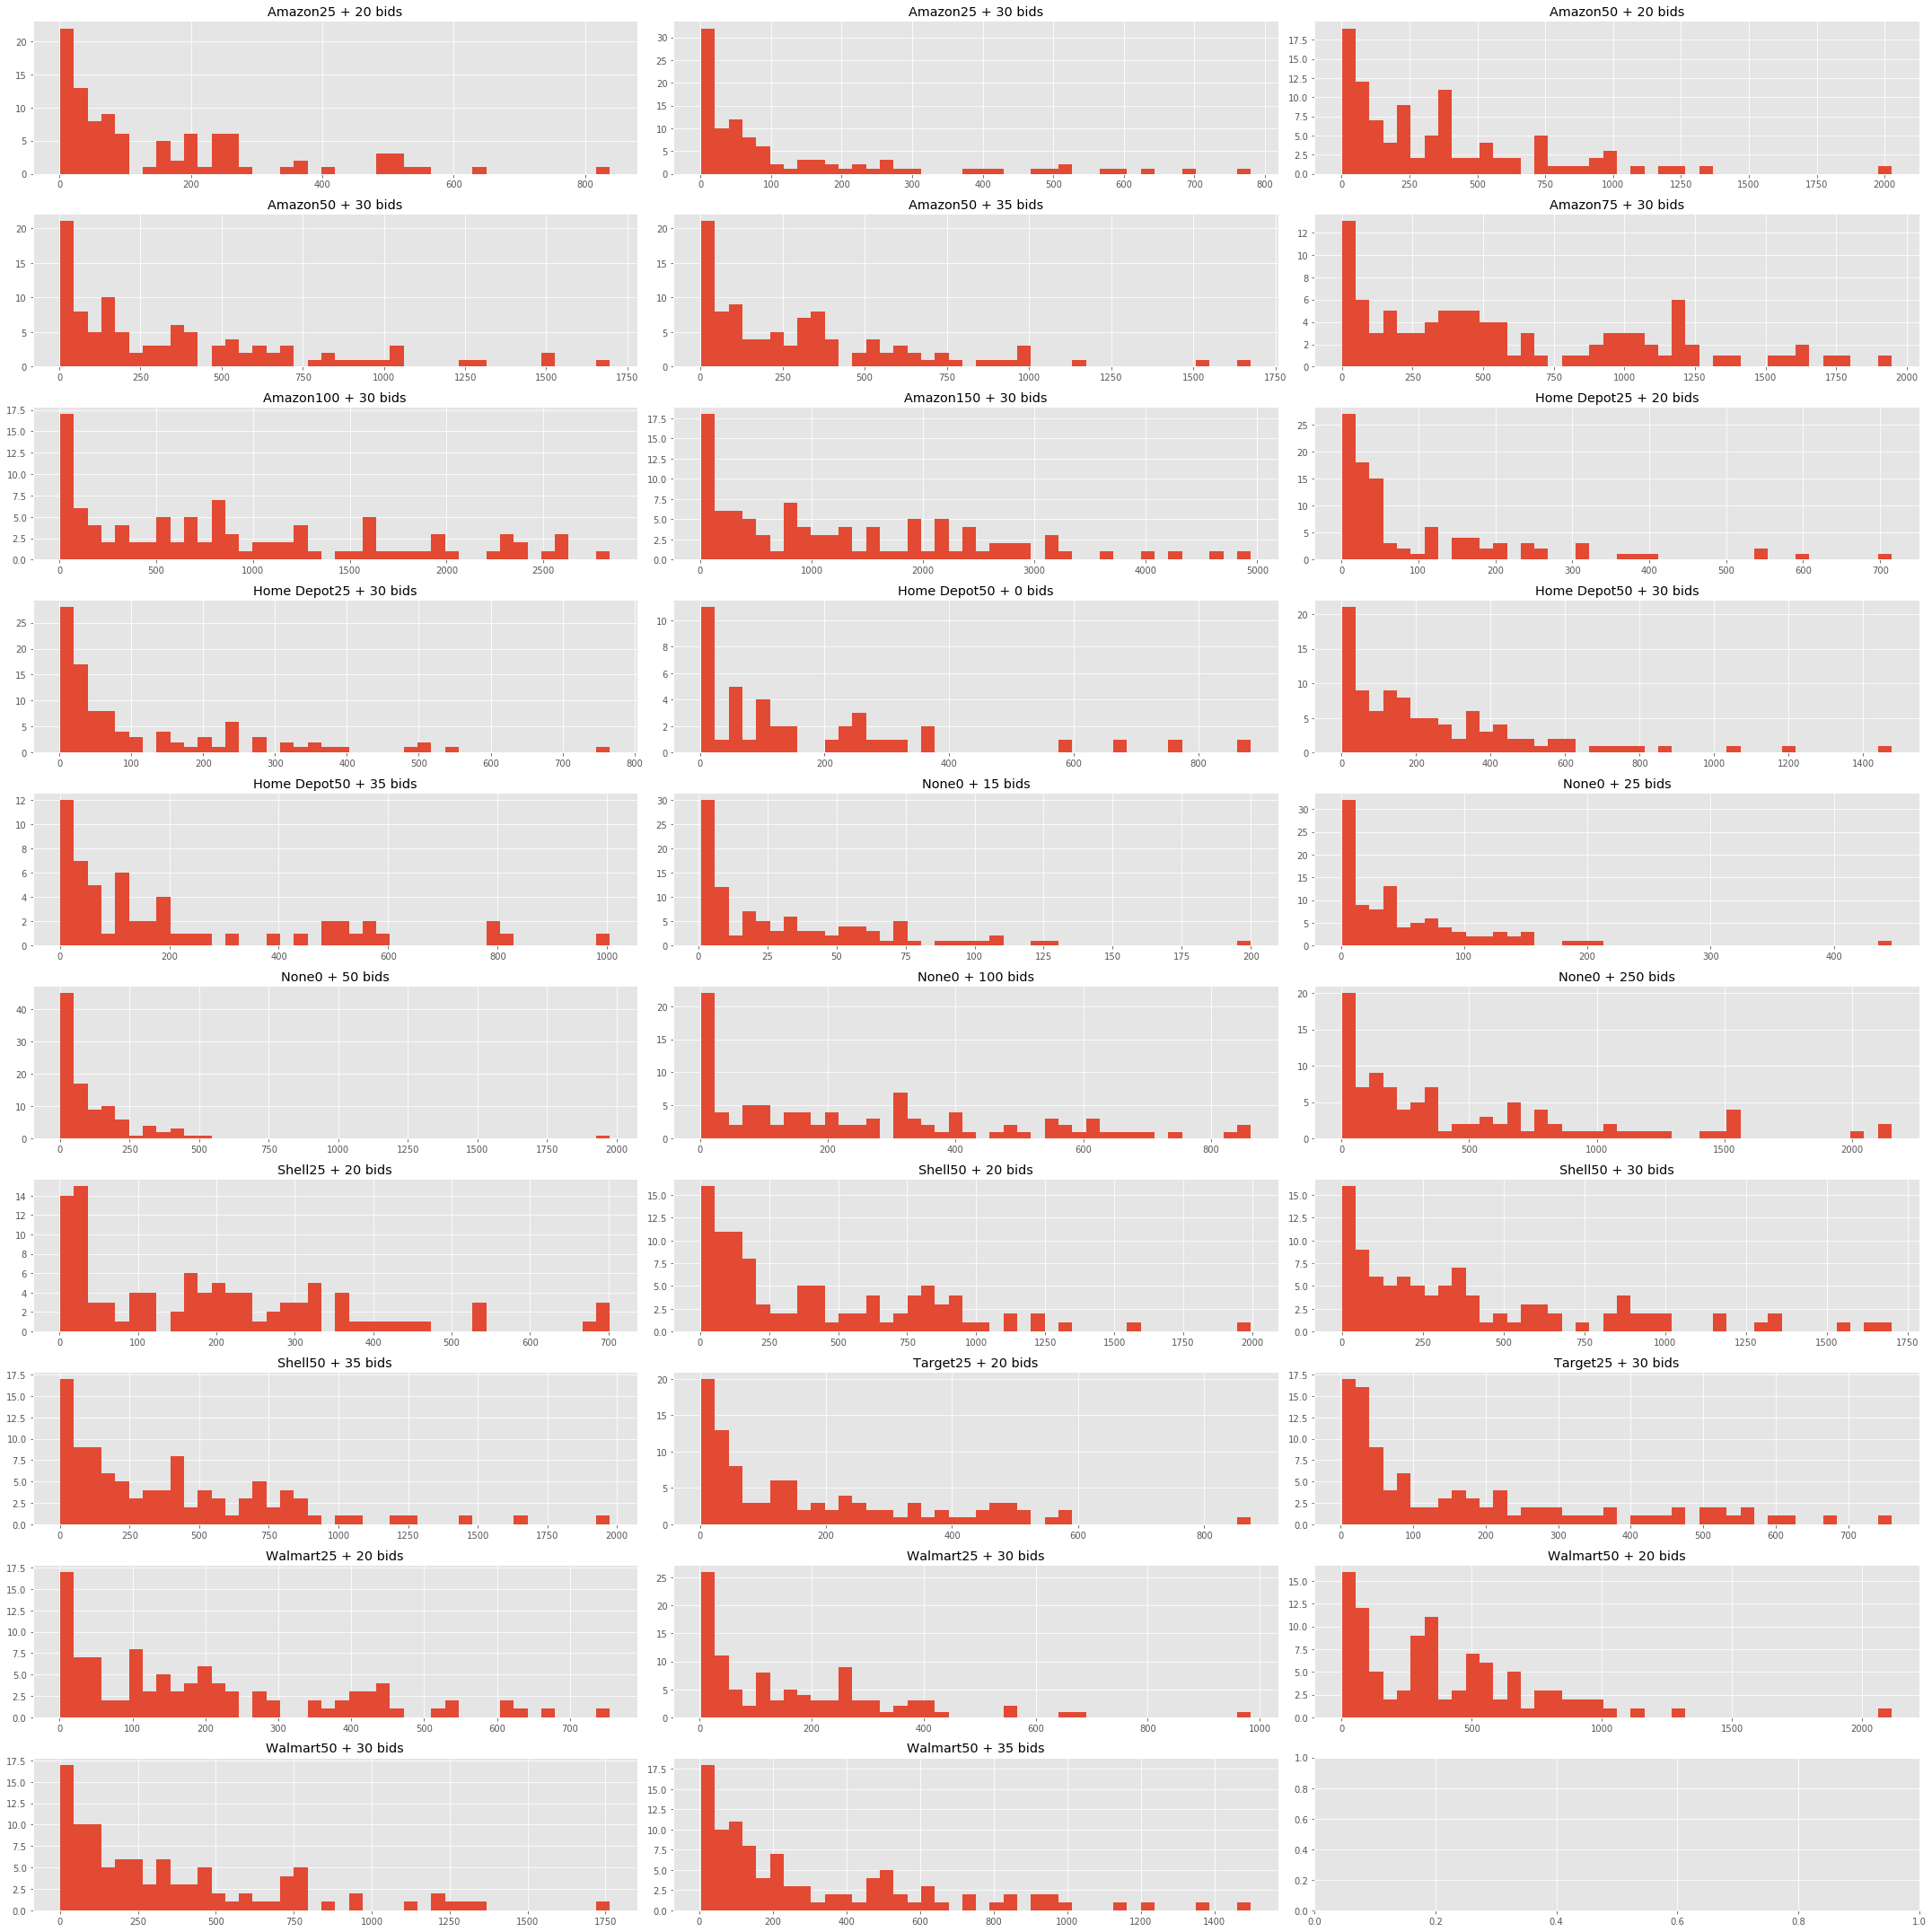

In [70]:
fig, ax = plt.subplots(10, 3, figsize=(30, 30))
axes = ax.ravel()

for a, idx in enumerate(df[df.is_winner==1].groupby(["cardtype", "cardvalue", "bidvalue"]).count().index):
    axes[a].set_title(idx[0]+str(idx[1])+ " + " + str(idx[2]) + " bids")
    axes[a].hist(df.bid[(df.cardtype==idx[0])&(df.cardvalue==idx[1])&(df.bidvalue==idx[2])&(df.is_winner==True)], bins=40)
    plt.tight_layout()

In [71]:
df[df.giveup==True]

,auctionid,cardvalue,auctiontime,bidvalue,cardtype,limited_allowed,bid,username,is_bidomatic,is_winner,is_pen,eventual_win_price,bids_so_far,eventual_bids,giveup,bidomatic_bids_so_far
2,100653479,0,2020-02-02 13:37:05,250,None,False,3,songbird0321,False,False,False,15,1,1,True,0
9,100653479,0,2020-02-02 13:37:05,250,None,False,10,fumantwo,False,False,False,15,3,3,True,0
13,100653479,0,2020-02-02 13:37:05,250,None,False,14,LMSretired48,True,False,True,15,4,4,True,4
59,101176885,0,2020-02-02 09:16:41,50,None,True,45,wlstbnkbh,True,False,False,56,16,16,True,14
69,101176885,0,2020-02-02 09:16:41,50,None,True,55,LMSretired48,True,False,True,56,20,20,True,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893933,999768365,0,2020-01-30 12:19:22,100,None,False,477,debby1228,False,False,False,617,4,4,True,0
894018,999768365,0,2020-01-30 12:19:22,100,None,False,562,cindyboogs47,False,False,False,617,72,72,True,0
894020,999768365,0,2020-01-30 12:19:22,100,None,False,564,Mt900534,True,False,False,617,135,135,True,135
894050,999768365,0,2020-01-30 12:19:22,100,None,False,594,mlee1168,False,False,False,617,5,5,True,0


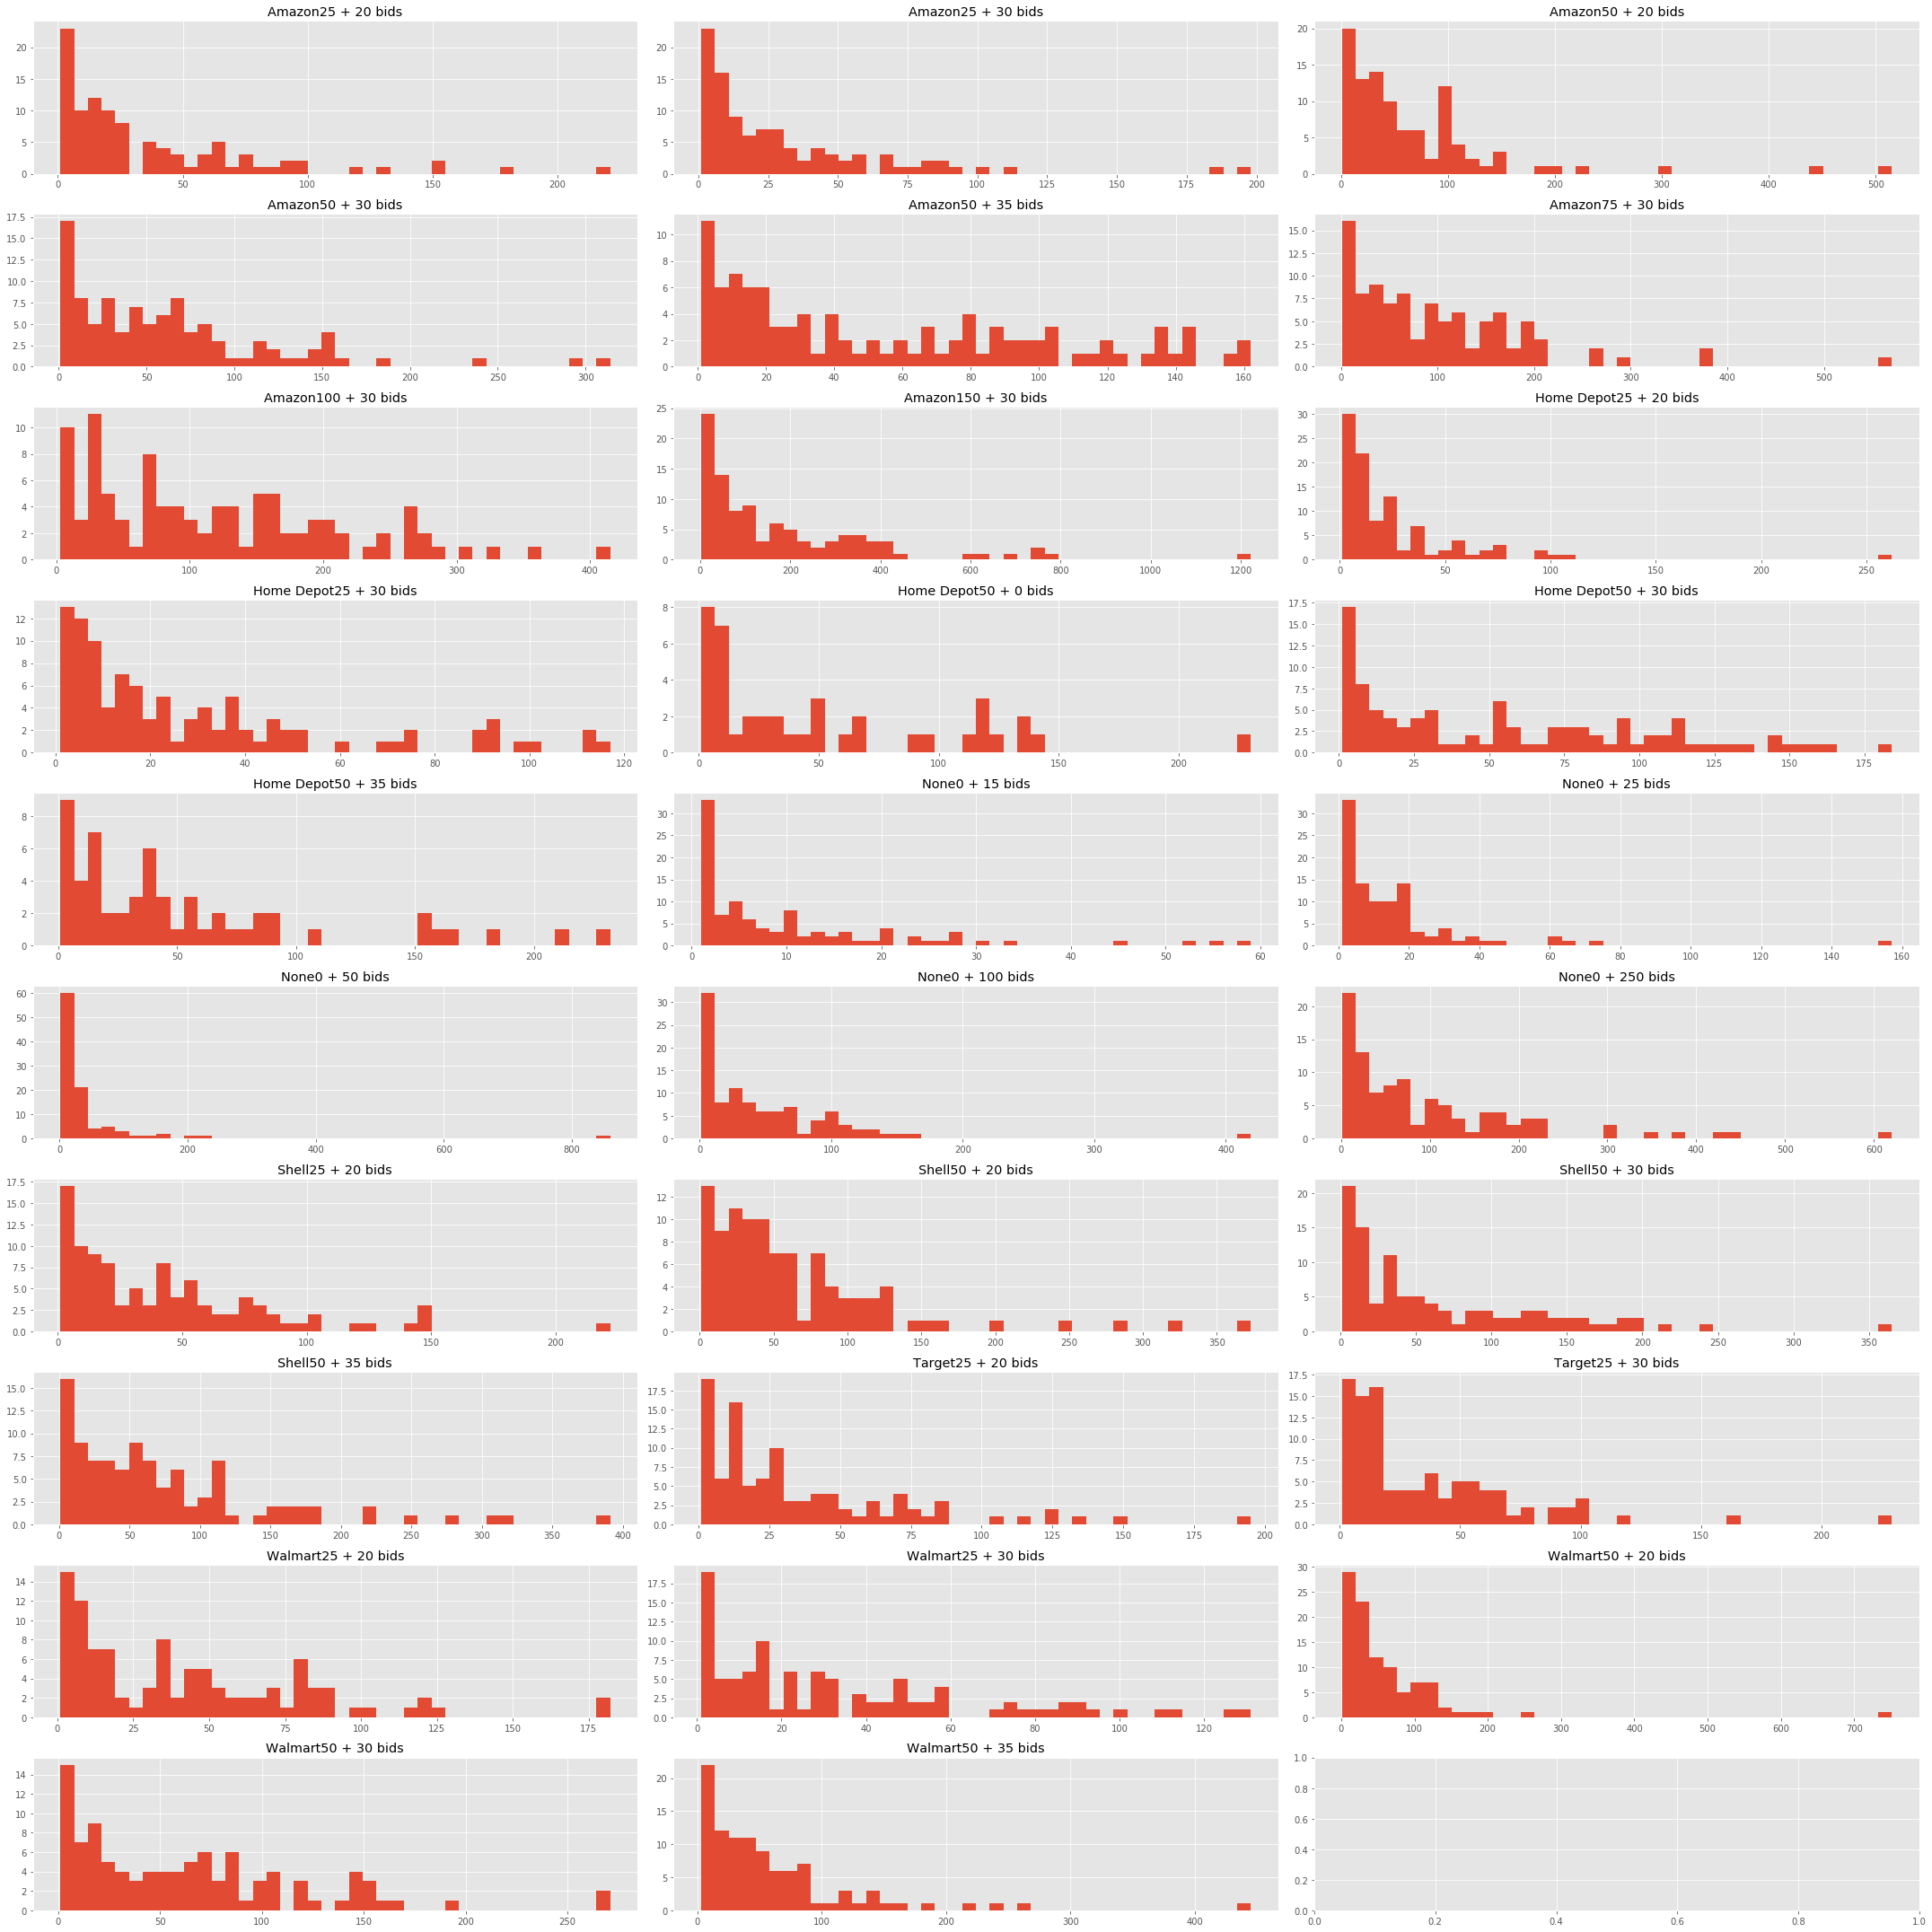

In [80]:
fig, ax = plt.subplots(10, 3, figsize=(30, 30))
axes = ax.ravel()

for a, idx in enumerate(df[df.giveup==1].groupby(["cardtype", "cardvalue", "bidvalue"]).count().index):
    axes[a].set_title(idx[0]+str(idx[1])+ " + " + str(idx[2]) + " bids")
    axes[a].hist(df.bids_so_far[(df.cardtype==idx[0])&(df.cardvalue==idx[1])&(df.bidvalue==idx[2])&(df.is_winner==True)], bins=40)
    plt.tight_layout()

In [106]:
c=1
for i in df[df.giveup==1].groupby("bids_so_far").count().auctionid:
    print(c, i)
    c += 1

1 6034
2 2390
3 2062
4 854
5 1858
6 450
7 344
8 335
9 249
10 302
11 214
12 181
13 165
14 146
15 147
16 126
17 121
18 127
19 108
20 127
21 99
22 88
23 99
24 63
25 125
26 74
27 78
28 71
29 65
30 104
31 55
32 64
33 76
34 60
35 59
36 48
37 70
38 51
39 51
40 51
41 56
42 57
43 51
44 41
45 63
46 41
47 35
48 43
49 44
50 101
51 41
52 42
53 31
54 39
55 36
56 34
57 35
58 35
59 37
60 33
61 32
62 19
63 37
64 30
65 31
66 34
67 27
68 30
69 38
70 38
71 30
72 31
73 29
74 46
75 71
76 35
77 50
78 48
79 40
80 41
81 24
82 31
83 31
84 17
85 31
86 23
87 28
88 28
89 18
90 27
91 29
92 19
93 29
94 26
95 22
96 20
97 21
98 26
99 27
100 35
101 21
102 18
103 20
104 20
105 22
106 20
107 17
108 23
109 22
110 25
111 28
112 18
113 17
114 15
115 22
116 18
117 15
118 21
119 18
120 28
121 13
122 19
123 19
124 19
125 33
126 20
127 25
128 18
129 16
130 29
131 22
132 25
133 31
134 22
135 32
136 28
137 31
138 24
139 28
140 23
141 18
142 24
143 24
144 29
145 27
146 38
147 28
148 29
149 28
150 73
151 51
152 21
153 17
154 13
155